# BlackHole Temperature Evolution using Quantum Computing

### Import requires Libaraies

In [53]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [54]:
import pandas as pd

## Defining the Quantum Registers and Qubits

In [55]:
from qiskit_aer import StatevectorSimulator

In [56]:
num_qubits = 1
qreg = QuantumRegister(num_qubits, 'q')
qc = QuantumCircuit(1)

G = 6.67430e-11
h_bar = 1.0545718e-34
speed_of_light = 3.00e8
spin_bh = 0.2

## Define the functions Required

In [57]:
def apply_black_hole_properties(qc, mass, spin, qreg):
    qc.rx(2 * np.arcsin(np.sqrt(spin)), qreg[0])
    qc.rz(mass * np.pi, qreg[0]) 
    print(qc)

In [58]:
df=pd.read_csv('/Users/hari/Downloads/6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [59]:
def Calc(arr):
    plt.figure(figsize=(8, 6))

    for initial_mass_str in arr:
        initial_mass = float(initial_mass_str)

        t_max = 100
        delta_t = 1

        time = np.arange(0, t_max, delta_t)
        masses_bh = initial_mass * np.exp(-0.1 * time)

        temperature_data = []

        for i, mass_bh in enumerate(masses_bh):
            temperature = calculate_temperature(mass_bh)
            temperature_data.append(temperature)

        plt.plot(time, temperature_data, label=f"Mass: {initial_mass} kg")
        plt.xlabel("Time (quantum time units)")
        plt.ylabel("Temperature (K)")
        plt.title("Black Hole Temperature vs. Time")
        plt.legend()
        plt.grid()
        plt.tight_layout()


Stephen Hawking's black hole temperature formula is derived from quantum field theory and black hole thermodynamics. It states that black holes are not completely black but emit thermal radiation due to quantum effects near the event horizon. The temperature of this radiation is inversely proportional to the mass of the black hole. The formula is given by:

[T = (ħ   c^3 ) / ( 8  π  G  M)]

Where:
- **T** is the Hawking temperature.
- **ħ** is the reduced Planck constant.
- **c** is the speed of light in vacuum.
- **G** is the gravitational constant.
- **M** is the mass of the black hole.

- Reduced Planck constant (ħ): Approximately 6.62607015 × 10^-34 m² kg/s
- Speed of light in vacuum (c): Approximately 299,792,458 m/s
- Gravitational constant (G): Approximately 6.67430 × 10^-11 m³/kg/s²


This formula suggests that smaller black holes have higher temperatures and thus radiate more energy. As a black hole loses energy through Hawking radiation, its mass decreases, and its temperature increases, leading to a runaway process known as black hole evaporation.


In [60]:
!pip install pylatexenc


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [61]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer


def apply_black_hole_properties(qc, mass, spin, qreg):
    qc.rx(2 * np.arcsin(np.sqrt(spin)), 0)  # Assuming only one qubit in the circuit
    qc.rz(mass * np.pi, 0)  # Assuming only one qubit in the circuit

    # Calculate circuit depth
    depth = qc.depth()

    # Calculate circuit width
    width = qc.width()

    # Draw the circuit
    print("Circuit Depth:", depth)
    print("Circuit Width:", width)
    print("Circuit:")
    #print(qc)

    circuit_drawer(qc)
    qc.draw()

    # Optionally, you can return depth and width
    return depth, width

# Define the quantum register with one qubit



In [62]:
qreg = QuantumRegister(1)
qc = QuantumCircuit(qreg)
apply_black_hole_properties(qc, 0.5, 0.6, qreg)
qc.draw()

Circuit Depth: 2
Circuit Width: 1
Circuit:


┌────────────┐┌─────────┐
q2: ┤ Rx(1.7722) ├┤ Rz(π/2) ├
    └────────────┘└─────────┘

In [63]:
def mass_from_luminosity(luminosity, alpha):
    """
    Calculate the mass of a star based on its luminosity using the mass-luminosity relation.
    
    Parameters:
        luminosity (float): Luminosity of the star (in solar luminosities).
        alpha (float): Exponent in the mass-luminosity relation.
    
    Returns:
        mass (float): Mass of the star (in solar masses).
    """
    # Constants
    mass_sun = 1.0  # Mass of the Sun in solar masses
    luminosity_sun = 1.0  # Luminosity of the Sun in solar luminosities
    
    # Calculate mass
    mass = (luminosity / luminosity_sun) ** (1 / alpha) * mass_sun
    
    return mass


In [64]:
df = pd.read_csv('/Users/hari/Downloads/6 class csv.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [65]:
df.describe

<bound method NDFrame.describe of      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     

In [66]:
luminostiy = df['Luminosity(L/Lo)'][10]
print(luminostiy)

0.0029


In [67]:
import numpy as np

def estimate_mass_from_temperature(temp, luminosity, absolute_magnitude):
    """
    Estimate the mass of a star based on its temperature, luminosity, and absolute magnitude.
    
    Parameters:
        temp (float): Temperature of the star in Kelvin.
        luminosity (float): Luminosity of the star normalized by the Sun's luminosity (L/L_sun).
        absolute_magnitude (float): Absolute magnitude of the star.
    
    Returns:
        mass (float): Estimated mass of the star normalized by the Sun's mass (M/M_sun).
    """
    # Step 1: Calculate Luminosity from Temperature
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W m^-2 K^-4
    radius = np.sqrt(luminosity / (4 * np.pi * sigma * (temp ** 4)))
    
    # Step 2: Use Mass-Luminosity-Radius Relationship to Estimate Mass
    # Here, we assume a constant value for the exponent alpha
    alpha = 3.5  # This value might vary depending on the type of star
    mass_ratio = (luminosity / (radius ** 2)) ** (1 / alpha)
    
    return mass_ratio

# Assuming df is your DataFrame
temperature_star = df['Temperature (K)'][0]
luminosity_star = df['Luminosity(L/Lo)'][0]
absolute_magnitude_star = df['Absolute magnitude(Mv)'][0]

estimated_mass = estimate_mass_from_temperature(temperature_star, luminosity_star, absolute_magnitude_star)
print("Estimated mass of the star (M/M_sun):", estimated_mass)


Estimated mass of the star (M/M_sun): 169.29372593735167


In [68]:
temperature_star = df['Temperature (K)'][0]
luminosity_star = df['Luminosity(L/Lo)'][0]
absolute_magnitude_star = df['Absolute magnitude(Mv)'][0]

In [69]:
estimated_mass = estimate_mass_from_temperature(temperature_star, luminosity_star, absolute_magnitude_star)
print("Estimated mass of the star (M/M_sun):", estimated_mass)

Estimated mass of the star (M/M_sun): 169.29372593735167


In [70]:
estimated_masses = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the temperature, luminosity, and absolute magnitude for the current star
    temperature_star = row['Temperature (K)']
    luminosity_star = row['Luminosity(L/Lo)']
    absolute_magnitude_star = row['Absolute magnitude(Mv)']
    
    # Calculate the estimated mass for the current star
    estimated_mass = estimate_mass_from_temperature(temperature_star, luminosity_star, absolute_magnitude_star)
    
    # Append the estimated mass to the list
    estimated_masses.append(estimated_mass)

In [71]:
df['Mass'] = estimated_masses

In [72]:
h_bar = 1.0545718e-34  # Reduced Planck constant (m^2 kg / s)
speed_of_light = 299792458  # Speed of light (m/s)
G = 6.67430e-11  # Gravitational constant (m^3 / (kg * s^2))

# Sample mass data (replace with your actual DataFrame's 'Mass' column)
mass = np.array(df['Mass'])  # Example mass values

# Calculate temperature
temperature = (h_bar * speed_of_light**3) / (8 * np.pi * G * mass)

# Print the temperature for each mass
print(temperature)

[0.0100058  0.0101036  0.01208934 0.0111076  0.01690432 0.01092899
 0.01189568 0.01208934 0.01182901 0.01157899 0.00833458 0.00978318
 0.00976535 0.00826111 0.01182901 0.0090801  0.01111213 0.00809765
 0.00956282 0.00877615 0.00090994 0.00347499 0.00376247 0.00312223
 0.00146301 0.00192292 0.0030931  0.00349563 0.00214818 0.00375652
 0.00054739 0.00073879 0.00159773 0.00268484 0.00483247 0.00332154
 0.00405852 0.00433374 0.00470614 0.00504359 0.00777434 0.00900304
 0.00930258 0.0095355  0.01023422 0.00833458 0.00840122 0.00840391
 0.00826892 0.00064574 0.00863547 0.00795467 0.00775581 0.0079571
 0.00820422 0.00874999 0.00817861 0.00874999 0.00794982 0.00850995
 0.00907699 0.00880246 0.0103323  0.01095102 0.01052564 0.00922196
 0.01048481 0.01103102 0.01122666 0.01079422 0.00906459 0.0083161
 0.00919326 0.00970868 0.00846887 0.00960407 0.01071316 0.00907389
 0.01197871 0.00968058 0.00383523 0.00243276 0.00295101 0.00139516
 0.00175091 0.00269277 0.00210327 0.00233023 0.00180644 0.001183

In [73]:
df['Black_Hole_Temp']=temperature

In [74]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Mass,Black_Hole_Temp
0,3068,0.002400,0.1700,16.12,0,Red,M,169.293726,0.010006
1,3042,0.000500,0.1542,16.60,0,Red,M,167.655072,0.010104
2,2600,0.000300,0.1020,18.70,0,Red,M,140.116731,0.012089
3,2800,0.000200,0.1600,16.65,0,Red,M,152.500930,0.011108
4,1939,0.000138,0.1030,20.06,0,Red,M,100.206316,0.016904


In [75]:
df.drop(['Star type',	'Star color','Spectral Class'],axis=1,inplace=True)

In [76]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Mass,Black_Hole_Temp
0,3068,0.002400,0.1700,16.12,169.293726,0.010006
1,3042,0.000500,0.1542,16.60,167.655072,0.010104
2,2600,0.000300,0.1020,18.70,140.116731,0.012089
3,2800,0.000200,0.1600,16.65,152.500930,0.011108
4,1939,0.000138,0.1030,20.06,100.206316,0.016904


In [77]:
mass = np.array(df['Mass'])
def calculate_temperature(mass):
    qc = QuantumCircuit(qreg)
    apply_black_hole_properties(qc, mass, spin_bh, qreg)
    
    backend =  StatevectorSimulator()
    new_circuit = transpile(qc,backend)
    job = backend.run(new_circuit)
    result = job.result()
    statevector = result.get_statevector()
    h_bar = 1.0545718e-34  # Reduced Planck constant (m^2 kg / s)
    speed_of_light = 299792458  # Speed of light (m/s)
    G = 6.67430e-11  # Gravitational constant (m^3 / (kg * s^2))

    temperature = (h_bar * speed_of_light**3) / (8 * np.pi * G * mass)
    
    
    temperature = avg_energy / (3.15e7 * mass)  
    return temperature

In [78]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Mass,Black_Hole_Temp
0,3068,0.002400,0.1700,16.12,169.293726,0.010006
1,3042,0.000500,0.1542,16.60,167.655072,0.010104
2,2600,0.000300,0.1020,18.70,140.116731,0.012089
3,2800,0.000200,0.1600,16.65,152.500930,0.011108
4,1939,0.000138,0.1030,20.06,100.206316,0.016904


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_black_hole_temperature(mass):
    """
    Calculates the Hawking temperature of a black hole using classical physics equations.

    Parameters:
        mass (float): Mass of the black hole (in kg).

    Returns:
        temperature (float): Hawking temperature of the black hole (in Kelvin).
    """

    h_bar = 1.0545718e-34  # Reduced Planck constant (in m^2 kg / s)
    speed_of_light = 299792458  # Speed of light (in m/s)
    G = 6.67430e-11  # Gravitational constant (in m^3 / (kg * s^2))

    temperature = (h_bar * speed_of_light**3) / (8 * np.pi * G * mass)
    return temperature

In [80]:
def Calc_csv(df):

  dataset = df
  mass = dataset["Mass"]
  for i, row in dataset.iterrows():
      mass = row["Mass"]
      temperature = calculate_black_hole_temperature(mass)
      dataset.at[i, "Black_Hole_Temp"] = temperature  
  plt.figure(figsize=(8, 6))

  # Plot temperature vs. time_column_name (assuming numerical data)
  plt.scatter(dataset["Mass"], dataset["Black_Hole_Temp"],color='blue')# Scatter plot for relationship visualization
  #plt.scatter(dataset["Luminosity(L/Lo)"],dataset["Radius(R/Ro)"],color='red')
  plt.xlabel("Mass")
  plt.ylabel("Black Hole Temperature (K)")
  plt.title("Black Hole Mass vs. Temperature")
  plt.grid()
  plt.tight_layout()
  plt.show()

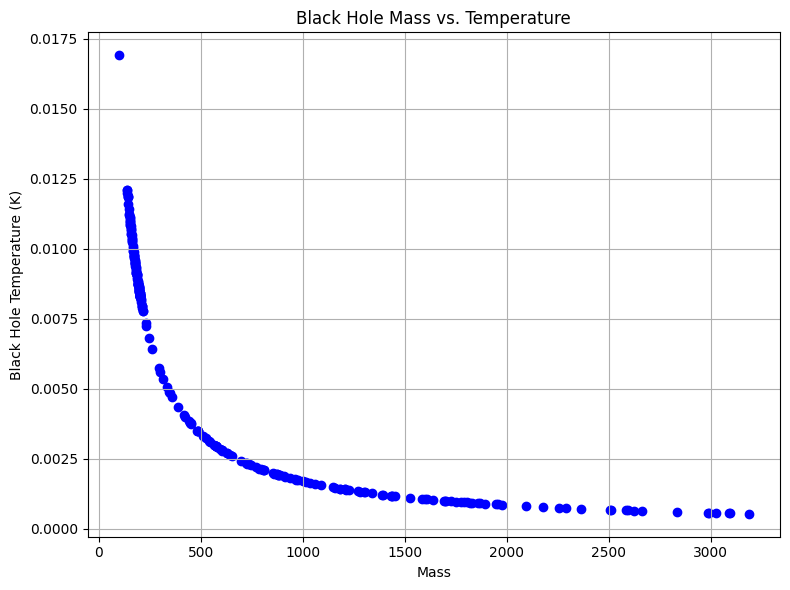

In [81]:
Calc_csv(df)

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_mass_temp(df):

  dataset = df

  plt.figure(figsize=(8, 6))
  plt.scatter(dataset["Absolute magnitude(Mv)"], dataset["Black_Hole_Temp"],color='blue')# Scatter plot for relationship visualization
  #plt.scatter(dataset["Luminosity(L/Lo)"],dataset["Radius(R/Ro)"],color='red')
  plt.xlabel("Absolute magnitude(Mv)")
  plt.ylabel("Black Hole Temperature (K)")
  plt.title("Absolute magnitude(Mv) vs. Temperature")
  plt.grid()
  plt.tight_layout()
  plt.show()

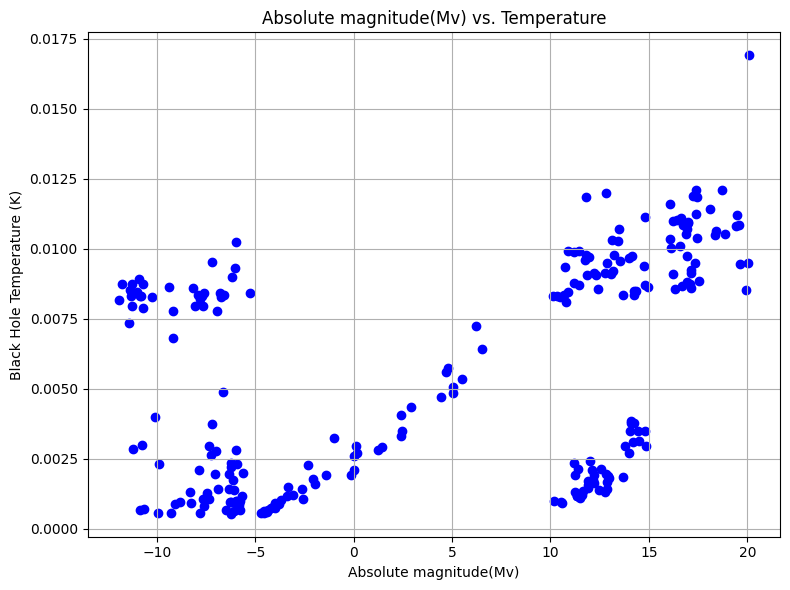

In [83]:
plot_mass_temp(df)